In [2]:
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
Employee = pd.read_csv('Employee.csv')
Performance = pd.read_csv('PerformanceRating.csv')

# Exploratory Data Analysis (EDA) 

In [4]:
Employee.head(5)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [5]:
Performance.head(5)

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [6]:
print(Employee.shape)
print(Performance.shape)

(1470, 23)
(6709, 11)


In [7]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [8]:
Performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [9]:
print(Employee.isna().sum()/len(Employee)*100)
print(Employee.duplicated().sum())

EmployeeID                 0.0
FirstName                  0.0
LastName                   0.0
Gender                     0.0
Age                        0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome (KM)      0.0
State                      0.0
Ethnicity                  0.0
Education                  0.0
EducationField             0.0
JobRole                    0.0
MaritalStatus              0.0
Salary                     0.0
StockOptionLevel           0.0
OverTime                   0.0
HireDate                   0.0
Attrition                  0.0
YearsAtCompany             0.0
YearsInMostRecentRole      0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
dtype: float64
0


In [10]:
print(Performance.isna().sum()/len(Performance)*100)
print(Performance.duplicated().sum())

PerformanceID                      0.0
EmployeeID                         0.0
ReviewDate                         0.0
EnvironmentSatisfaction            0.0
JobSatisfaction                    0.0
RelationshipSatisfaction           0.0
TrainingOpportunitiesWithinYear    0.0
TrainingOpportunitiesTaken         0.0
WorkLifeBalance                    0.0
SelfRating                         0.0
ManagerRating                      0.0
dtype: float64
0


In [11]:
Employee.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [12]:
Performance.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


# Data Preprocessing

In [13]:
def convert_education(df, column_name):
    education_map = {
        1: "No Formal Qualifications",
        2: "HighSchool",
        3: "Bachelor",
        4: "Master",
        5: "Doctorate"
    }
    df[column_name] = df[column_name].map(education_map)
    return df

def convert_satisfactionLevel(df, column_names):
    satisfaction_level = {
        1: "Very Dissatisfied",
        2: "Dissatisfied",
        3: "Neutral",
        4: "Satisfied",
        5: "Very Satisfied"
    }
    
    for col in column_names:
        df[col] = df[col].map(satisfaction_level)
    return df

def convert_RatingLevel(df, column_names):
    Rating_level = {
        1: "Unacceptable",
        2: "Needs Improvement",
        3: "Meets Expectation",
        4: "Exceeds Expectation",
        5: "Above and Beyond"
    }
    for col in column_names:
        df[col] = df[col].map(Rating_level)
    return df

In [14]:
convert_education(Employee,"Education")
Employee["Education"]

0        Doctorate
1           Master
2           Master
3         Bachelor
4       HighSchool
           ...    
1465    HighSchool
1466      Bachelor
1467        Master
1468      Bachelor
1469    HighSchool
Name: Education, Length: 1470, dtype: object

In [15]:
convert_satisfactionLevel(Performance , ['EnvironmentSatisfaction' , 'JobSatisfaction' , 'RelationshipSatisfaction'])
convert_RatingLevel(Performance , ['WorkLifeBalance','SelfRating' , 'ManagerRating'])
Performance[["EnvironmentSatisfaction" , "JobSatisfaction" ,"RelationshipSatisfaction" , "WorkLifeBalance" , "SelfRating" , "ManagerRating"]]

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,SelfRating,ManagerRating
0,Very Satisfied,Satisfied,Very Satisfied,Exceeds Expectation,Exceeds Expectation,Exceeds Expectation
1,Very Satisfied,Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation,Meets Expectation
2,Neutral,Satisfied,Very Satisfied,Meets Expectation,Above and Beyond,Exceeds Expectation
3,Very Satisfied,Neutral,Dissatisfied,Needs Improvement,Meets Expectation,Needs Improvement
4,Very Satisfied,Dissatisfied,Neutral,Exceeds Expectation,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...
6704,Very Satisfied,Neutral,Neutral,Above and Beyond,Above and Beyond,Exceeds Expectation
6705,Neutral,Very Satisfied,Satisfied,Meets Expectation,Exceeds Expectation,Exceeds Expectation
6706,Neutral,Satisfied,Dissatisfied,Needs Improvement,Meets Expectation,Needs Improvement
6707,Very Satisfied,Dissatisfied,Very Satisfied,Exceeds Expectation,Meets Expectation,Meets Expectation


In [16]:
Performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   object
 4   JobSatisfaction                  6709 non-null   object
 5   RelationshipSatisfaction         6709 non-null   object
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   object
 9   SelfRating                       6709 non-null   object
 10  ManagerRating                    6709 non-null   object
dtypes: int64(2), object(9)
memory usage: 576.7+ KB


In [17]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   object
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [18]:
merged_df = pd.merge(Employee, Performance, on='EmployeeID', how='left')

In [19]:
merged_df.head(-10)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,10/30/2016,Neutral,Neutral,Dissatisfied,3.0,0.0,Exceeds Expectation,Meets Expectation,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,10/30/2017,Satisfied,Satisfied,Very Satisfied,3.0,1.0,Needs Improvement,Meets Expectation,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,10/30/2018,Very Satisfied,Very Satisfied,Satisfied,3.0,0.0,Exceeds Expectation,Above and Beyond,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,10/30/2019,Very Dissatisfied,Neutral,Dissatisfied,3.0,1.0,Meets Expectation,Above and Beyond,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,10/31/2014,Neutral,Satisfied,Dissatisfied,1.0,0.0,Meets Expectation,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR5034,6/3/2021,Neutral,Neutral,Neutral,2.0,3.0,Meets Expectation,Above and Beyond,Above and Beyond
6885,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR6120,6/3/2022,Very Satisfied,Neutral,Very Satisfied,2.0,1.0,Meets Expectation,Meets Expectation,Meets Expectation
6886,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR691,6/5/2015,Satisfied,Neutral,Very Satisfied,3.0,0.0,Needs Improvement,Above and Beyond,Above and Beyond
6887,06B1-2653,Montgomery,Galliford,Male,19,Frequent Traveller,Technology,26,CA,Black or African American,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6899 entries, 0 to 6898
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   EmployeeID                       6899 non-null   object 
 1   FirstName                        6899 non-null   object 
 2   LastName                         6899 non-null   object 
 3   Gender                           6899 non-null   object 
 4   Age                              6899 non-null   int64  
 5   BusinessTravel                   6899 non-null   object 
 6   Department                       6899 non-null   object 
 7   DistanceFromHome (KM)            6899 non-null   int64  
 8   State                            6899 non-null   object 
 9   Ethnicity                        6899 non-null   object 
 10  Education                        6899 non-null   object 
 11  EducationField                   6899 non-null   object 
 12  JobRole             

In [21]:
Employee = merged_df[merged_df['PerformanceID'].notna()].copy()

In [22]:
Employee.head(-10)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,10/30/2016,Neutral,Neutral,Dissatisfied,3.0,0.0,Exceeds Expectation,Meets Expectation,Meets Expectation
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,10/30/2017,Satisfied,Satisfied,Very Satisfied,3.0,1.0,Needs Improvement,Meets Expectation,Needs Improvement
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,10/30/2018,Very Satisfied,Very Satisfied,Satisfied,3.0,0.0,Exceeds Expectation,Above and Beyond,Above and Beyond
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,10/30/2019,Very Dissatisfied,Neutral,Dissatisfied,3.0,1.0,Meets Expectation,Above and Beyond,Exceeds Expectation
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,10/31/2014,Neutral,Satisfied,Dissatisfied,1.0,0.0,Meets Expectation,Exceeds Expectation,Meets Expectation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6871,45F9-3A37,Talbot,Sturgess,Male,21,Some Travel,Technology,34,CA,Black or African American,...,PR3103,5/23/2019,Neutral,Satisfied,Dissatisfied,2.0,1.0,Above and Beyond,Above and Beyond,Exceeds Expectation
6872,45F9-3A37,Talbot,Sturgess,Male,21,Some Travel,Technology,34,CA,Black or African American,...,PR345,5/24/2014,Very Satisfied,Satisfied,Dissatisfied,1.0,2.0,Above and Beyond,Above and Beyond,Above and Beyond
6873,45F9-3A37,Talbot,Sturgess,Male,21,Some Travel,Technology,34,CA,Black or African American,...,PR3993,5/22/2020,Satisfied,Very Satisfied,Neutral,3.0,0.0,Exceeds Expectation,Above and Beyond,Exceeds Expectation
6874,45F9-3A37,Talbot,Sturgess,Male,21,Some Travel,Technology,34,CA,Black or African American,...,PR4993,5/22/2021,Satisfied,Neutral,Dissatisfied,1.0,1.0,Above and Beyond,Meets Expectation,Meets Expectation


In [23]:
unique_ids = Employee['EmployeeID'].nunique()
print("Number of unique Employee IDs:", unique_ids)

Number of unique Employee IDs: 1280


In [24]:
Employee['ReviewDate'] = pd.to_datetime(Employee['ReviewDate'], errors='coerce')
Employee['HireDate'] = pd.to_datetime(Employee['HireDate'], errors='coerce')
Employee['ReviewYear'] = Employee['ReviewDate'].dt.year

In [25]:
Employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6709 entries, 0 to 6886
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6709 non-null   object        
 1   FirstName                        6709 non-null   object        
 2   LastName                         6709 non-null   object        
 3   Gender                           6709 non-null   object        
 4   Age                              6709 non-null   int64         
 5   BusinessTravel                   6709 non-null   object        
 6   Department                       6709 non-null   object        
 7   DistanceFromHome (KM)            6709 non-null   int64         
 8   State                            6709 non-null   object        
 9   Ethnicity                        6709 non-null   object        
 10  Education                        6709 non-null   object     

# Attrition vs Performance Trends Over Time

In [26]:
satisfaction_map = {
    "Very Dissatisfied": 1,
    "Dissatisfied": 2,
    "Neutral": 3,
    "Satisfied": 4,
    "Very Satisfied": 5
}

rating_map = {
    "Unacceptable": 1,
    "Needs Improvement": 2,
    "Meets Expectation": 3,
    "Exceeds Expectation": 4,
    "Above and Beyond": 5
}

Employee['JobSatisfactionScore'] = Employee['JobSatisfaction'].map(satisfaction_map)
Employee['EnvironmentSatisfactionScore'] =  Employee['EnvironmentSatisfaction'].map(satisfaction_map)
Employee['ManagerRatingScore'] = Employee['ManagerRating'].map(rating_map)
Employee['SelfRatingScore'] = Employee['SelfRating'].map(rating_map)

grouped = Employee.groupby(['ReviewYear' , 'Attrition']).agg({
    'JobSatisfactionScore': 'mean',
    'EnvironmentSatisfactionScore': 'mean',
    'ManagerRatingScore': 'mean',
    'SelfRatingScore': 'mean'
}).reset_index()

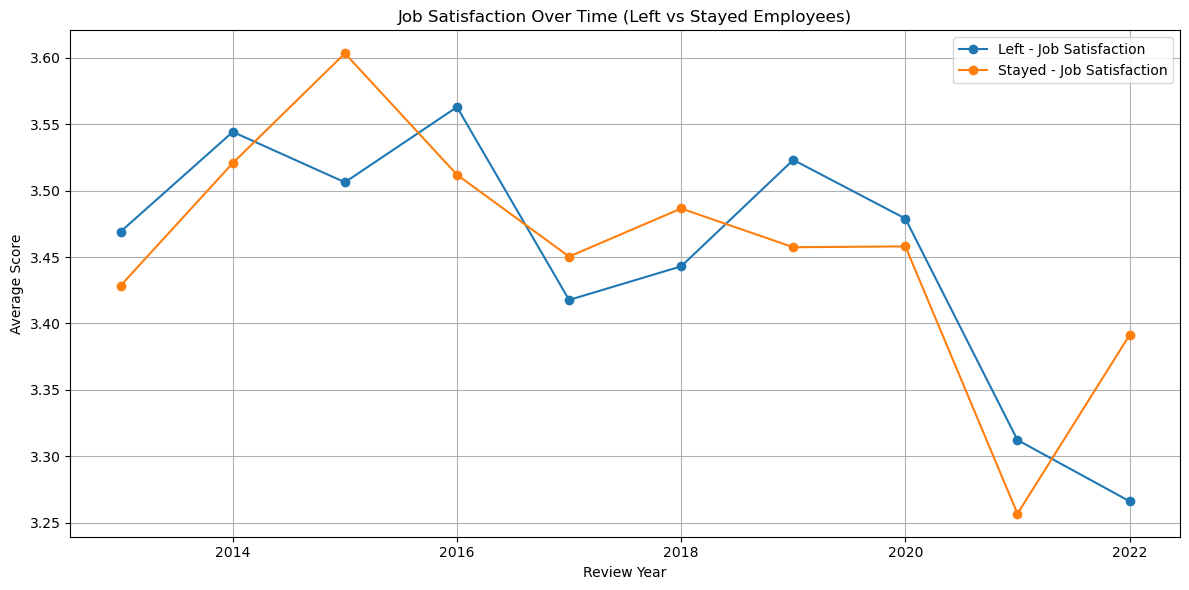

In [27]:
left = grouped[grouped['Attrition'] == 'Yes']
stayed = grouped[grouped['Attrition'] == 'No']

plt.figure(figsize = (12, 6))

plt.plot(left['ReviewYear'], left['JobSatisfactionScore'] ,label='Left - Job Satisfaction', marker='o')
plt.plot(stayed['ReviewYear'], stayed['JobSatisfactionScore'] ,label='Stayed - Job Satisfaction', marker='o')

plt.title('Job Satisfaction Over Time (Left vs Stayed Employees)')
plt.xlabel('Review Year')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Satisfaction and Ratings Progression 

C:\Users\marie\AppData\Local\Temp\ipykernel_52092\291669475.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_avg = Employee.groupby('ReviewYear').mean().reset_index()


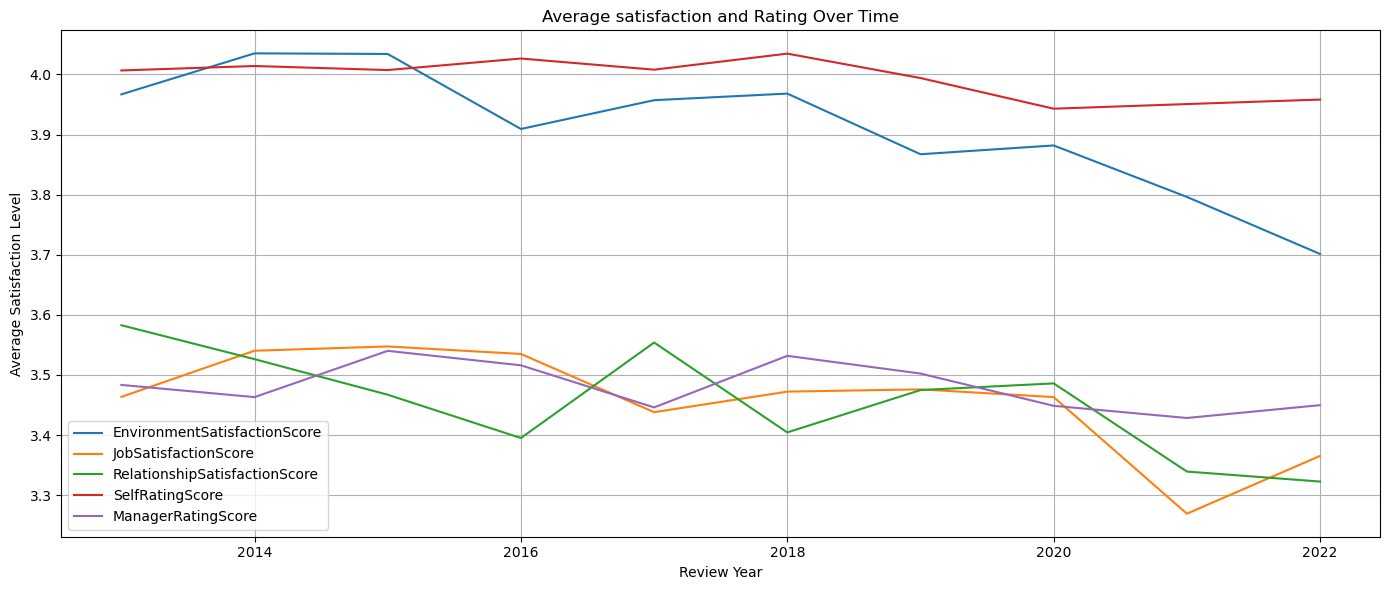

In [28]:
Employee['RelationshipSatisfactionScore'] =  Employee['RelationshipSatisfaction'].map(satisfaction_map)
yearly_avg = Employee.groupby('ReviewYear').mean().reset_index()

plt.figure(figsize=(14, 6))
for col in ['EnvironmentSatisfactionScore' , 'JobSatisfactionScore' , 'RelationshipSatisfactionScore' , 'SelfRatingScore' , 'ManagerRatingScore']:
    sns.lineplot(x='ReviewYear' , y= col , data =yearly_avg , label = col )
    
plt.title('Average satisfaction and Rating Over Time')
plt.xlabel('Review Year')
plt.ylabel('Average Satisfaction Level')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compare Average JobSatisfaction and WorkLifeBalance by Overtime

In [31]:
Employee['WorkLifeBalanceScore'] = Employee['WorkLifeBalance'].map(rating_map)
overtime_group = Employee.groupby('OverTime')[['JobSatisfactionScore', 'WorkLifeBalanceScore']].mean().reset_index()

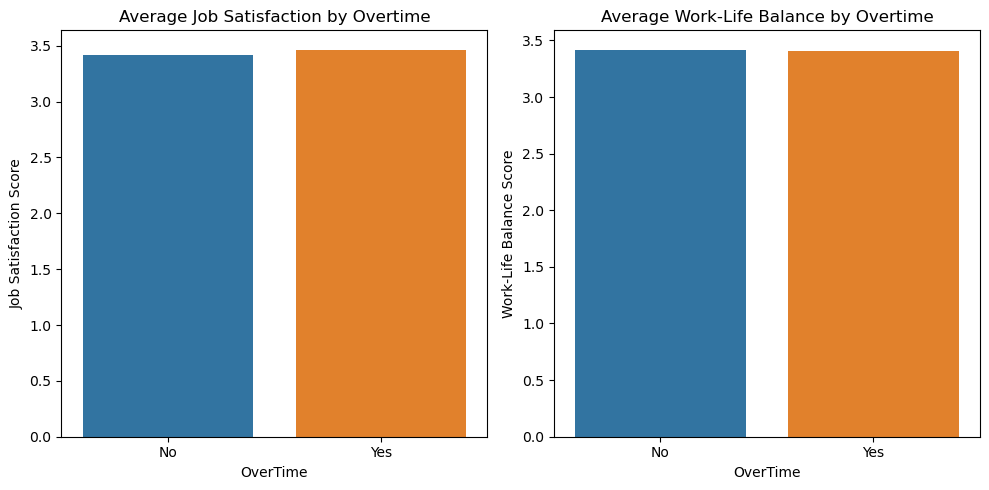

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='OverTime' , y='JobSatisfactionScore' , data = overtime_group)
plt.title('Average Job Satisfaction by Overtime')
plt.ylabel('Job Satisfaction Score')

plt.subplot(1, 2, 2)
sns.barplot(x='OverTime', y='WorkLifeBalanceScore', data=overtime_group)
plt.title('Average Work-Life Balance by Overtime')
plt.ylabel('Work-Life Balance Score')

plt.tight_layout()
plt.show()

# Check Attrition Rate by Overtime

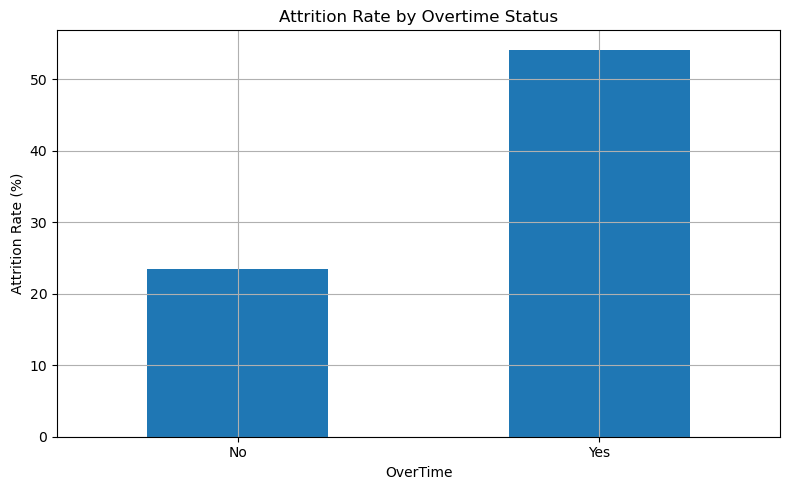

In [34]:
attrition_rate = Employee.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_rate = attrition_rate * 100
attrition_rate[['Yes']].plot(kind='bar', figsize=(8,5), legend=False)
plt.title('Attrition Rate by Overtime Status')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('OverTime')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Average Job Satisfaction by Department

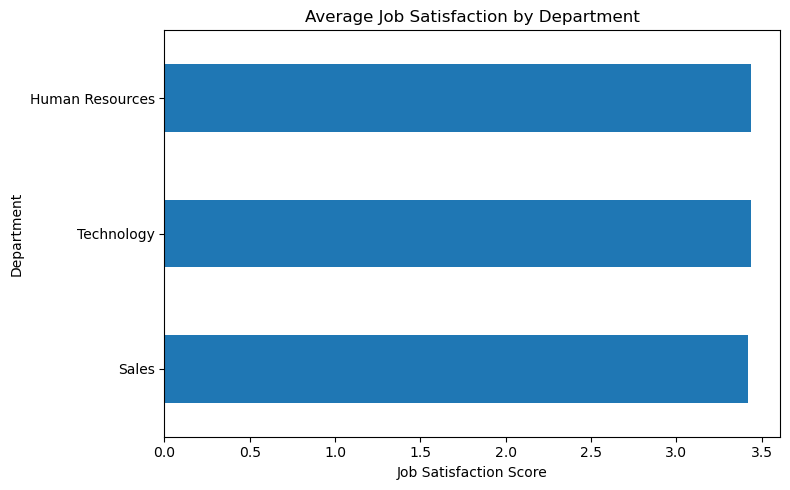

In [38]:
job_satisfaction_dept = Employee.groupby('Department')['JobSatisfactionScore'].mean().sort_values()
job_satisfaction_dept.plot(kind='barh', figsize=(8,5), title='Average Job Satisfaction by Department')
plt.xlabel('Job Satisfaction Score')
plt.tight_layout()
plt.show()

# Work-Life Balance & Attrition Rate by Job Role

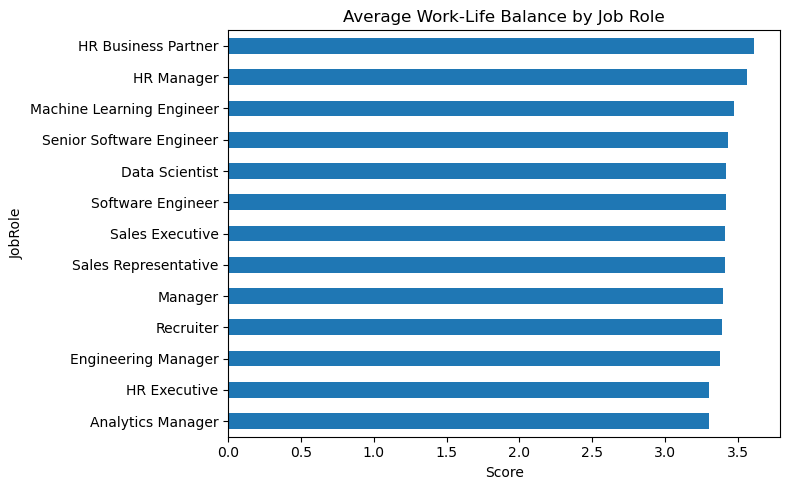

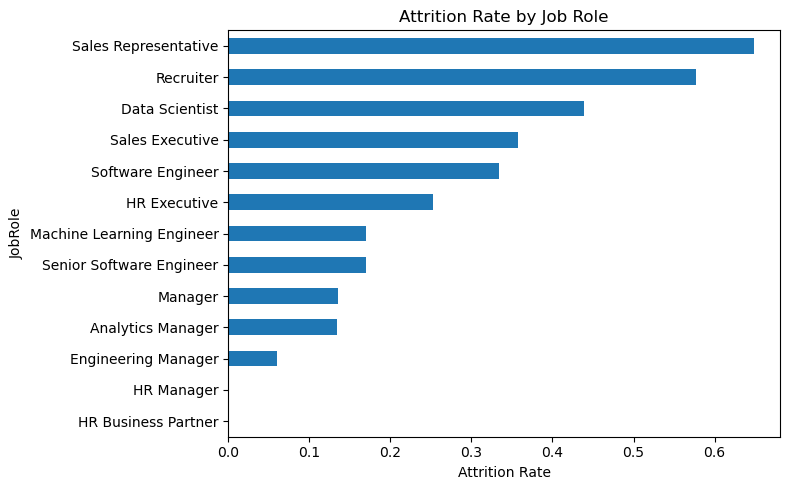

In [39]:
wlb_by_role = Employee.groupby('JobRole')['WorkLifeBalanceScore'].mean().sort_values()
wlb_by_role.plot(kind='barh', figsize=(8,5), title='Average Work-Life Balance by Job Role')
plt.xlabel('Score')
plt.tight_layout()
plt.show()

attrition_by_role = Employee.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_by_role['Yes'].sort_values().plot(kind='barh', title='Attrition Rate by Job Role', figsize=(8,5))
plt.xlabel('Attrition Rate')
plt.tight_layout()
plt.show()

# Promotion Speed by Department

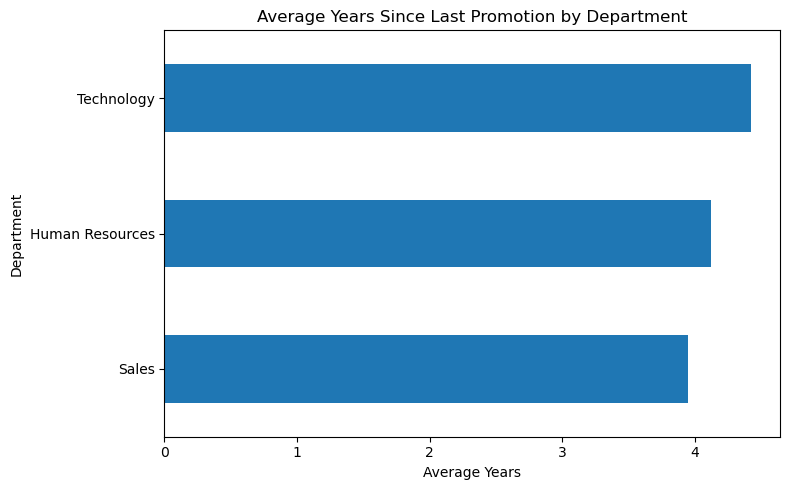

In [41]:
promo_by_dept = Employee.groupby('Department')['YearsSinceLastPromotion'].mean().sort_values()

promo_by_dept.plot(kind='barh', figsize=(8,5), title='Average Years Since Last Promotion by Department')
plt.xlabel('Average Years')
plt.tight_layout()
plt.show()

# Are There Gender-Based Differences in Satisfaction, Attrition, or Promotions?

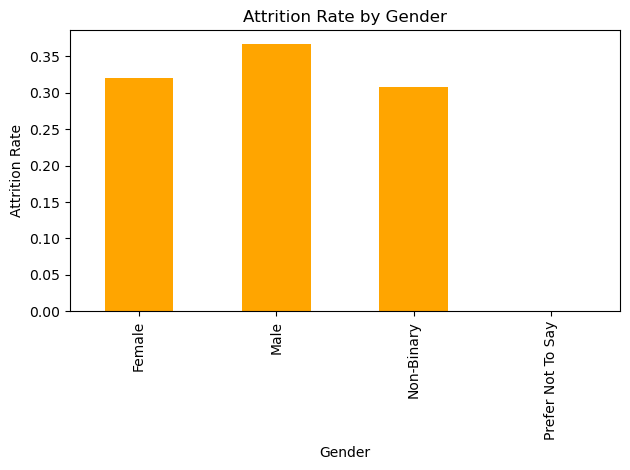

In [42]:
gender_attrition = Employee.groupby('Gender')['Attrition'].value_counts(normalize = True).unstack()
gender_attrition['Yes'].plot(kind = 'bar' , color = 'orange' , title = 'Attrition Rate by Gender')
plt.ylabel('Attrition Rate')
plt.tight_layout()
plt.show()

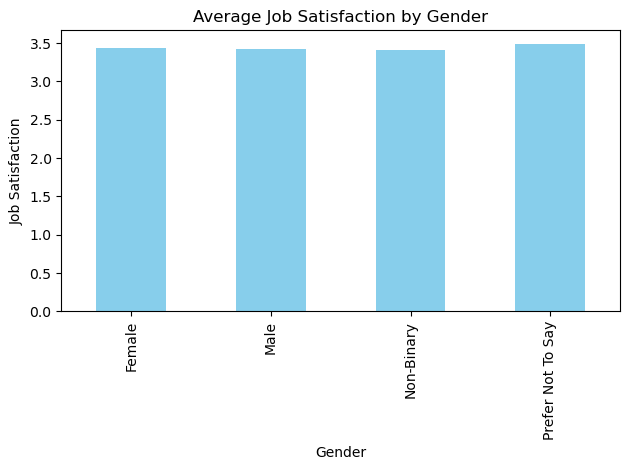

In [43]:
gender_satisfaction = Employee.groupby('Gender')['JobSatisfactionScore'].mean()
gender_satisfaction.plot(kind='bar', color='skyblue', title='Average Job Satisfaction by Gender')
plt.ylabel('Job Satisfaction')
plt.tight_layout()
plt.show()

C:\Users\marie\AppData\Local\Temp\ipykernel_52092\1201726913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Employee['PromotionFrequency'] = Employee['YearsSinceLastPromotion'] / Employee['YearsAtCompany']


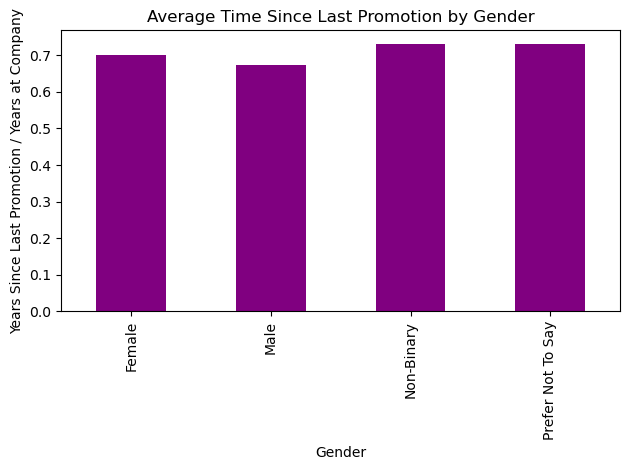

In [44]:
Employee = Employee[Employee['YearsAtCompany'] != 0]
Employee['PromotionFrequency'] = Employee['YearsSinceLastPromotion'] / Employee['YearsAtCompany']
gender_promotion = Employee.groupby('Gender')['PromotionFrequency'].mean()
gender_promotion.plot(kind='bar', color='purple', title='Average Time Since Last Promotion by Gender')
plt.ylabel('Years Since Last Promotion / Years at Company')
plt.tight_layout()
plt.show()

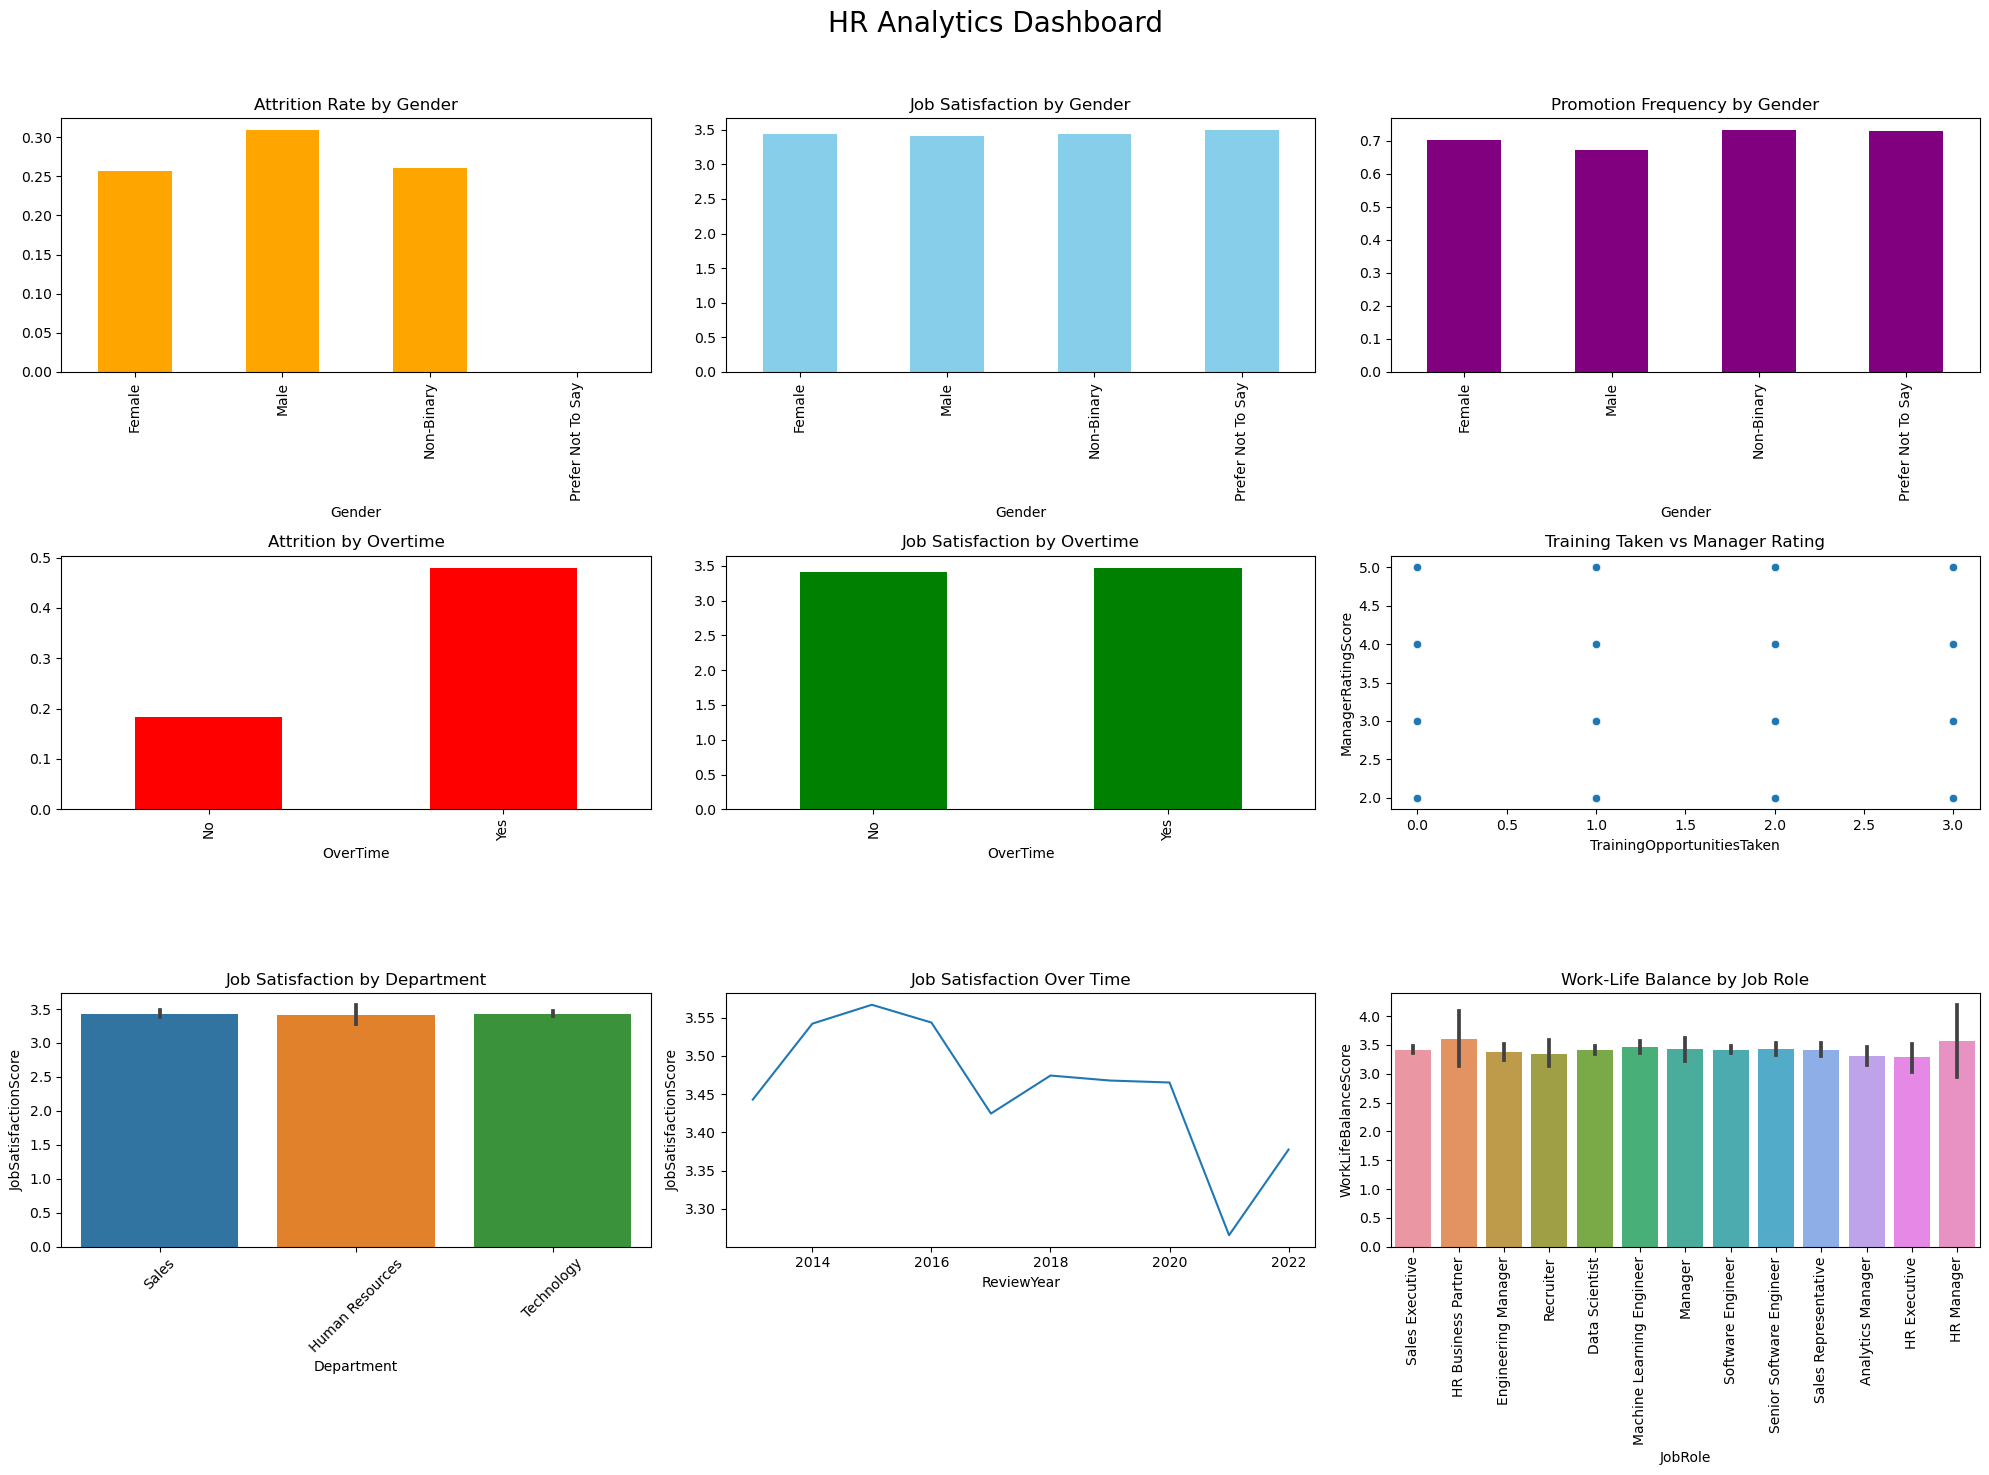

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('HR Analytics Dashboard', fontsize=20)

# 1. Attrition Rate by Gender
gender_attrition = Employee.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
gender_attrition['Yes'].plot(kind='bar', ax=axs[0, 0], color='orange', title='Attrition Rate by Gender')

# 2. Job Satisfaction by Gender
gender_satisfaction = Employee.groupby('Gender')['JobSatisfactionScore'].mean()
gender_satisfaction.plot(kind='bar', ax=axs[0, 1], color='skyblue', title='Job Satisfaction by Gender')

# 3. Promotion Frequency by Gender
promotion_data = Employee[Employee['YearsAtCompany'] != 0].copy()
promotion_data['PromotionFrequency'] = promotion_data['YearsSinceLastPromotion'] / promotion_data['YearsAtCompany']
gender_promotion = promotion_data.groupby('Gender')['PromotionFrequency'].mean()
gender_promotion.plot(kind='bar', ax=axs[0, 2], color='purple', title='Promotion Frequency by Gender')

# 4. Attrition by Overtime
overtime_attrition = Employee.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
overtime_attrition['Yes'].plot(kind='bar', ax=axs[1, 0], color='red', title='Attrition by Overtime')

# 5. Job Satisfaction by Overtime
overtime_satisfaction = Employee.groupby('OverTime')['JobSatisfactionScore'].mean()
overtime_satisfaction.plot(kind='bar', ax=axs[1, 1], color='green', title='Job Satisfaction by Overtime')

# 6. Training vs Manager Rating
sns.scatterplot(data=Employee, x='TrainingOpportunitiesTaken', y='ManagerRatingScore', ax=axs[1, 2])
axs[1, 2].set_title('Training Taken vs Manager Rating')

# 7. Satisfaction by Department
sns.barplot(data=Employee, x='Department', y='JobSatisfactionScore', ax=axs[2, 0])
axs[2, 0].set_title('Job Satisfaction by Department')
axs[2, 0].tick_params(axis='x', rotation=45)

# 8. Job Satisfaction Over Time
yearly_avg = Employee.groupby('ReviewYear')[['JobSatisfactionScore']].mean().reset_index()
sns.lineplot(data=yearly_avg, x='ReviewYear', y='JobSatisfactionScore', ax=axs[2, 1])
axs[2, 1].set_title('Job Satisfaction Over Time')

# 9. Work-Life Balance by Job Role
sns.barplot(data=Employee, x='JobRole', y='WorkLifeBalanceScore', ax=axs[2, 2])
axs[2, 2].set_title('Work-Life Balance by Job Role')
axs[2, 2].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
